<a href="https://colab.research.google.com/github/prasann25/colab/blob/main/03_convolutional_neural_network_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


##  Get the data

The images we're working with are the from the Food101 dataset (101 different classes of food) :[https://www.kaggle.com/kmader/food41](https://www.kaggle.com/kmader/food41)

However we've modified it to only use 2 classes (pizza & steak) using the image data modification notebook : [https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

Note : We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesnt work)


In [53]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-06-30 07:15:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   281MB/s    in 0.4s    

2021-06-30 07:15:56 (281 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is become one with the data.

And for a computer vision.. this usually means visualizing many samples of your data.

In [54]:
! ls pizza_steak/

test  train


In [55]:
! ls pizza_steak/train

pizza  steak


In [56]:
! ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [57]:
import os
# Walk through pizza_steak directoty and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak") :
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [58]:
# the extra file in out pizza_steak directory is ".DS_Store"
! ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 30 06:43 .
drwxr-xr-x 1 root root 4096 Jun 30 07:15 ..
-rw-r--r-- 1 root root 6148 Jun 30 07:15 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 30 06:43 test
drwxr-xr-x 4 root root 4096 Jun 30 06:43 train


In [59]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [60]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

To visualize our images, first let's get the class names programmatically.


In [61]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created  a list of class_names from the subdirectories
class_names = class_names[1:] #remove .DS_store
print(class_names)

['pizza' 'steak']


In [62]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class) :
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['1795316.jpg']
Image shape: (512, 512, 3)


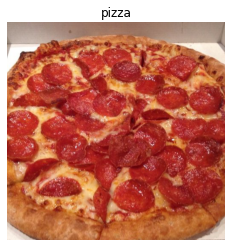

In [63]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [64]:
# The images we've imported and plotted are actually arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[160, 142, 130],
        [160, 142, 130],
        [159, 141, 129],
        ...,
        [147, 125, 112],
        [135, 113, 100],
        [133, 111,  98]],

       [[160, 142, 130],
        [160, 142, 130],
        [159, 141, 129],
        ...,
        [146, 124, 111],
        [135, 113, 100],
        [134, 112,  99]],

       [[161, 143, 131],
        [161, 143, 131],
        [160, 142, 130],
        ...,
        [143, 121, 108],
        [133, 111,  98],
        [135, 113, 100]],

       ...,

       [[253, 243, 233],
        [252, 242, 232],
        [252, 242, 232],
        ...,
        [238, 221, 211],
        [236, 219, 209],
        [232, 218, 207]],

       [[247, 237, 227],
        [249, 239, 229],
        [251, 241, 231],
        ...,
        [217, 200, 190],
        [217, 200, 190],
        [214, 200, 189]],

       [[235, 225, 215],
        [240, 230, 220],
        [245, 235, 225],
        ...,
        [171, 154, 14

In [65]:
#  View the image shape
img.shape # returns width , height , color channels

(512, 512, 3)

**Note** : As we've discussed before, many machine learning model, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [66]:
# Get all the pixels values between 0 and 1
img/255.

array([[[0.62745098, 0.55686275, 0.50980392],
        [0.62745098, 0.55686275, 0.50980392],
        [0.62352941, 0.55294118, 0.50588235],
        ...,
        [0.57647059, 0.49019608, 0.43921569],
        [0.52941176, 0.44313725, 0.39215686],
        [0.52156863, 0.43529412, 0.38431373]],

       [[0.62745098, 0.55686275, 0.50980392],
        [0.62745098, 0.55686275, 0.50980392],
        [0.62352941, 0.55294118, 0.50588235],
        ...,
        [0.57254902, 0.48627451, 0.43529412],
        [0.52941176, 0.44313725, 0.39215686],
        [0.5254902 , 0.43921569, 0.38823529]],

       [[0.63137255, 0.56078431, 0.51372549],
        [0.63137255, 0.56078431, 0.51372549],
        [0.62745098, 0.55686275, 0.50980392],
        ...,
        [0.56078431, 0.4745098 , 0.42352941],
        [0.52156863, 0.43529412, 0.38431373],
        [0.52941176, 0.44313725, 0.39215686]],

       ...,

       [[0.99215686, 0.95294118, 0.91372549],
        [0.98823529, 0.94901961, 0.90980392],
        [0.98823529, 0

## An end to end example of a CNN model

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to :
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess the data(get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary", 
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed = 42)

# Build a CNN model(same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters =10, 
                               kernel_size=3, 
                               activation="relu",
                               input_shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, 
                                  padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

                                            

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 0.5560 - accuracy: 0.7067 - val_loss: 0.4714 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4273 - accuracy: 0.8007 - val_loss: 0.3569 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4002 - accuracy: 0.8273 - val_loss: 0.3313 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3738 - accuracy: 0.8393 - val_loss: 0.2914 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3294 - accuracy: 0.8613 - val_loss: 0.2812 - val_accuracy: 0.8780


**Note** : If the above cell is taking longer than ~10 seconds per epoch , make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU( you may ave to rerun some cells above)

In [ ]:
# There is batch size of 32 images per batch, so len(train_data) = 47
1500/32

In [ ]:
# Without the GPU runtime

# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 103s 2s/step - loss: 0.5768 - accuracy: 0.6913 - val_loss: 0.3942 - val_accuracy: 0.8080
# Epoch 2/5
# 47/47 [==============================] - 101s 2s/step - loss: 0.4195 - accuracy: 0.8140 - val_loss: 0.3745 - val_accuracy: 0.8380
# Epoch 3/5
#  6/47 [==>...........................] - ETA: 1:19 - loss: 0.4097 - accuracy: 0.8385

In [ ]:
# # With GPU runtime
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 13s 203ms/step - loss: 0.5454 - accuracy: 0.7167 - val_loss: 0.4035 - val_accuracy: 0.8360
# Epoch 2/5
# 47/47 [==============================] - 9s 186ms/step - loss: 0.4212 - accuracy: 0.8113 - val_loss: 0.3391 - val_accuracy: 0.8620
# Epoch 3/5
# 47/47 [==============================] - 9s 189ms/step - loss: 0.4072 - accuracy: 0.8220 - val_loss: 0.3362 - val_accuracy: 0.8740
# Epoch 4/5
# 47/47 [==============================] - 9s 187ms/step - loss: 0.3737 - accuracy: 0.8433 - val_loss: 0.3123 - val_accuracy: 0.8660
# Epoch 5/5
# 47/47 [==============================] - 9s 186ms/step - loss: 0.3358 - accuracy: 0.8540 - val_loss: 0.3099 - val_accuracy: 0.8800

In [ ]:
# Get a model summary

model_1.summary()

**Pratice/Exercise** : Goto the CNN explainer here [https://poloclub.github.io/cnn-explainer/](https://poloclub.github.io/cnn-explainer/)

## Using the same model as before

Let's replicate the model we've built in a previous section to see if works with our image data.
The model we're building is from the [TensorFlow playground.](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2&seed=0.37865&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps= len(valid_data))

In [ ]:
# Get a summary of model_2
model_2.summary()

Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly...let's try to improve it

In [ ]:
# Set the random_seed
tf.random.set_seed(42)

# Create the model(same as above but let's step it up a notch)
model_3  = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(train_data, 
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data) 
)

In [ ]:
# Get a summary of model_3
model_3.summary()


In [ ]:
15000000  / 31000

**Note**  : You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might that more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

In [ ]:
model_1.summary()

## Binary Classificaiton. Let's break it down

1. Become one with the data(visualize, visualize, visualize)
2. Preprocess the data(prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust the different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data(visualize, visualize, visualize)

In [ ]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn out data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does for a couple of reasons :
1. 10000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...[https://twitter.com/ylecun/status/989610208497360896?s=20](https://twitter.com/ylecun/status/989610208497360896?s=20)


In [ ]:
# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,   # Target directory of images  
                                               target_size=(224, 224), # Target size of images(height, width)
                                               class_mode="binary", # type of data you're workng with
                                               batch_size=32) # size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)


In [ ]:
# How many batches are there
len(train_data), 1500/32

In [ ]:
len(test_data), 500/32

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

In [ ]:
images[7], images[7].shape

In [ ]:
# view the first batch of labels
labels

### 3. Create a CNN model ( start with a baseline)

* A baseline is a relative simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting, you try to beat the baseline.


> **Note** : In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating  our model a little easier
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
tf.random.set_seed(42)

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10, # Number of sliding windows going across an input (higher=more complex model)
           kernel_size=(3, 3), # size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output is same as input shape, if "valid" - output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer(working with binary classificaion so  only 1 output)
])

**Practice** : Understand what's going on in a Conv2D later by going through the CNN explainer website for 10-20 minutes.
[https://poloclub.github.io/cnn-explainer/](https://poloclub.github.io/cnn-explainer/)


In [ ]:
# Compile the model 
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# Get a summary of our model
model_4.summary()

### 4. Fit the Model

In [ ]:
# Check the lengths of training and test data generators

len(train_data), len(test_data)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
            epochs=5,
            steps_per_epoch=len(train_data), # each epoch would take len(train_data) = 47 steps 
            validation_data = test_data,
            validation_steps=len(test_data))


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.


In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot validation and training curves separately
def plot_loss_curves(history) :
  """
   Return separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


In [ ]:
plot_loss_curves(history_4)

> **Note**: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize the unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps :
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting :
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the the output of our flattened layer

Reduce overfitting :
* Add data augmentation
* Add regularization layers ( such as MaxPool2D)
* Add more data...

> **Note** : Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
tf.random.set_seed(42)
model_5 = Sequential([
      Conv2D(filters=10, 
             kernel_size=3, 
             #strides=1,  
             #padding="valid",
             activation="relu", # Taking default padding and strides value
             input_shape=(224, 224, 3)),
      MaxPool2D(pool_size=2), # Condensing the input to smaller output 
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation="sigmoid")      
      ])



In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit the model
history_5 = model_5.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data=test_data, 
                        validation_steps=len(valid_data)
                        )

In [ ]:
# Get a summary of our model with max pooling
model_5.summary()
# Max pooling layer half the size of input shape (since we gave default pool size = 2)
# As a result , the total params is much lower than model_4

In [ ]:
# Plot losss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [83]:
# Create ImageDataGenerator training instance wiht data augmentation
training_data_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, #zoom in random image
                                             width_shift_range=0.2, # move your image around on x-axis
                                             height_shift_range=0.2, # move your image around y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)



> **Question** : What is data augmentation ?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing more generalizable(hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [84]:
# Import data and augment it from training directory

print("Augmented training data:")
train_data_augmented = training_data_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32, 
                                                                   class_mode = "binary",
                                                                   shuffle=False) # For Demo purpose only
# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Create non-augmented test data batches
IMG_SIZE = (224, 224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE, # Another way of defining using global var
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)


                                                                   

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note** : Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.


Finally let's visualize some augmented data

In [85]:
# Get sample data batches
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next() # note : label's aren't augmented... only data(images)

Showing image number : 0


(-0.5, 223.5, 223.5, -0.5)

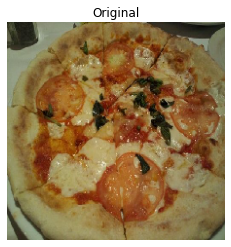

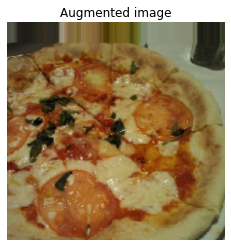

In [88]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 31) # batch_size = 32...
print(f"Showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title("Original")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)


Now we've seen what augmented data looks like, let's build a model and see how it learns on augmented data

In [93]:
# Create model (same as model_5)
model_6 = Sequential([
        Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
        MaxPool2D(pool_size=2),
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")       
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [94]:
# Fit the model against the augmented data
history_6 = model_6.fit(train_data_augmented,
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 444ms/step - loss: 0.7835 - accuracy: 0.5187 - val_loss: 0.7171 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 431ms/step - loss: 0.6880 - accuracy: 0.5280 - val_loss: 0.6660 - val_accuracy: 0.6480
Epoch 3/5
47/47 [==============================] - 20s 436ms/step - loss: 0.6833 - accuracy: 0.5720 - val_loss: 0.6343 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 20s 435ms/step - loss: 0.6604 - accuracy: 0.6287 - val_loss: 0.5805 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 20s 431ms/step - loss: 0.6458 - accuracy: 0.6373 - val_loss: 0.6142 - val_accuracy: 0.6100


**Note** : The reason the model_6 fitting is slow because the training data needs to be augmented on the fly as it dont store augmented data on the drive

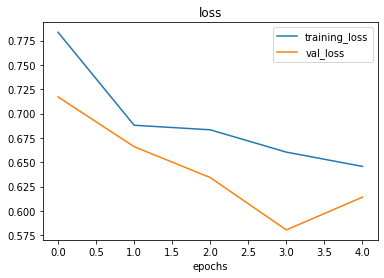

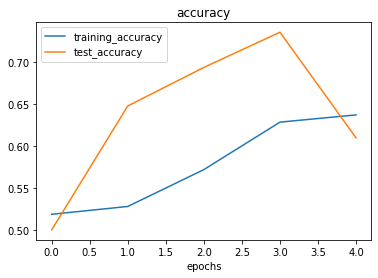

In [95]:
 # Check our model training curves
 plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens

In [96]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = training_data_augmented.flow_from_directory(train_dir, 
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True
                                                                            ) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [98]:
# Create the model_7 (same as model_5 and model_6)
model_7 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7  = model_7.fit(train_data_augmented_shuffled,  # we're fitting on augmented shuffled data
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 21s 432ms/step - loss: 0.6664 - accuracy: 0.5773 - val_loss: 0.6167 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 20s 422ms/step - loss: 0.5672 - accuracy: 0.7253 - val_loss: 0.4197 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 20s 426ms/step - loss: 0.5338 - accuracy: 0.7447 - val_loss: 0.4098 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 20s 425ms/step - loss: 0.5197 - accuracy: 0.7567 - val_loss: 0.4283 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 20s 422ms/step - loss: 0.5277 - accuracy: 0.7607 - val_loss: 0.4112 - val_accuracy: 0.8460


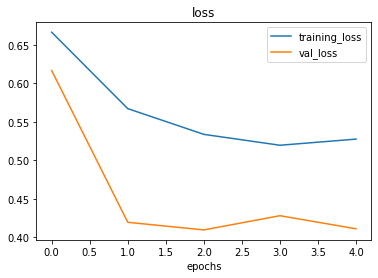

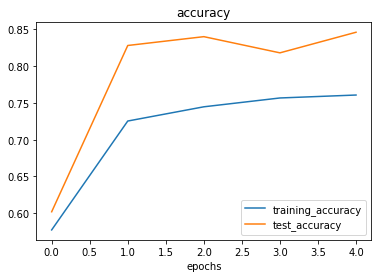

In [99]:
#Plot loss curves
plot_loss_curves(history_7)